In [39]:
# importing libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [40]:
pwd

'C:\\Users\\Virender Pal Singh\\Desktop\\Document\\machine_learing'

In [41]:
cd C:\\Users\\Virender Pal Singh\\Desktop\\Document\\machine_learing\\

C:\Users\Virender Pal Singh\Desktop\Document\machine_learing


In [42]:
data = pd.read_csv('C:\\Users\\Virender Pal Singh\\Desktop\\Document\\machine_learing\\Admission_Predict_Ver1.1.csv')

In [43]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [44]:
data["GRE Score"].head()

0    337
1    324
2    316
3    322
4    314
Name: GRE Score, dtype: int64

In [45]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [46]:
# to know information about the table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


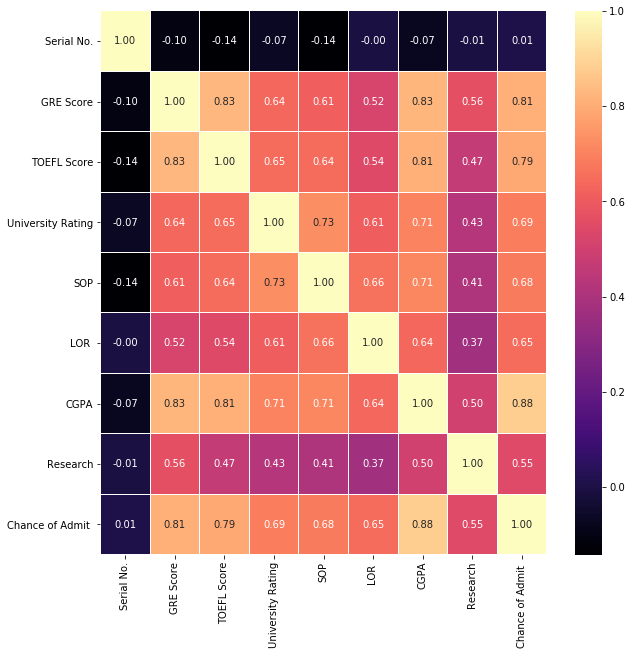

In [47]:
# Correlation between All Columns

fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [48]:
# finding how many students have research paper and not having research paper 
print("Not Having Research:",len(data[data.Research == 0]))
print("Having Research:",len(data[data.Research == 1]))

Not Having Research: 220
Having Research: 280


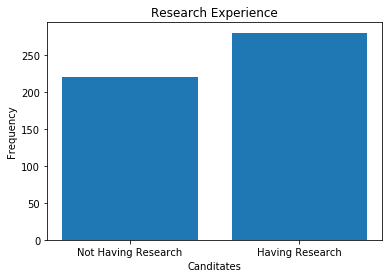

In [49]:
# plotting the above data
y = np.array([len(data[data.Research == 0]),len(data[data.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

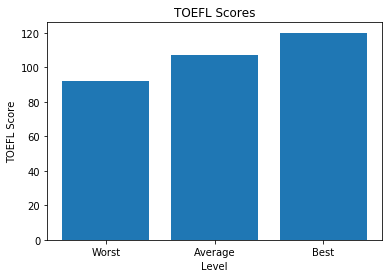

In [50]:
y = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()


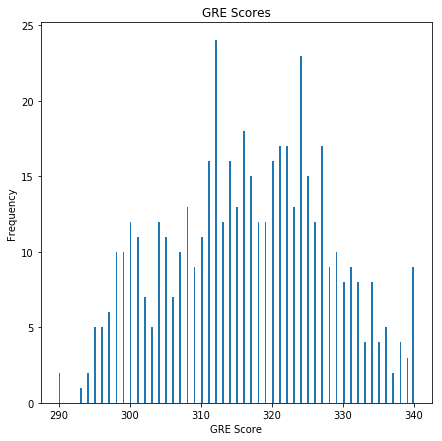

In [51]:
# plotting the frequecy for the GRE scorce
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (7,7))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

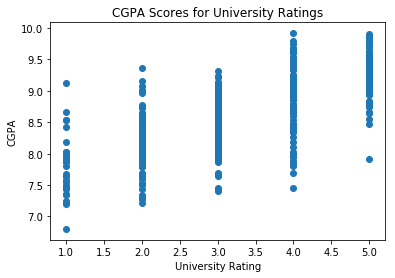

In [52]:
# CGPA Scores for University Ratings:
plt.scatter(data["University Rating"],data["CGPA"])
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

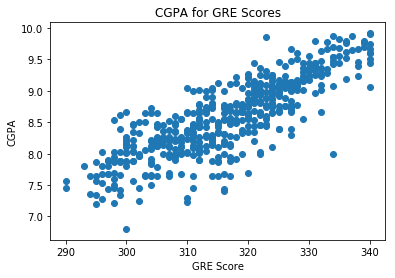

In [53]:
plt.scatter(data["GRE Score"],data.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

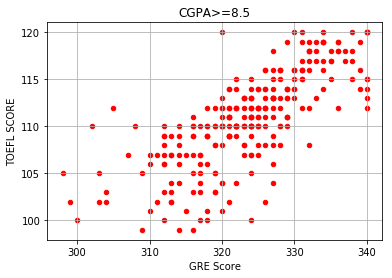

In [54]:
data[data.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

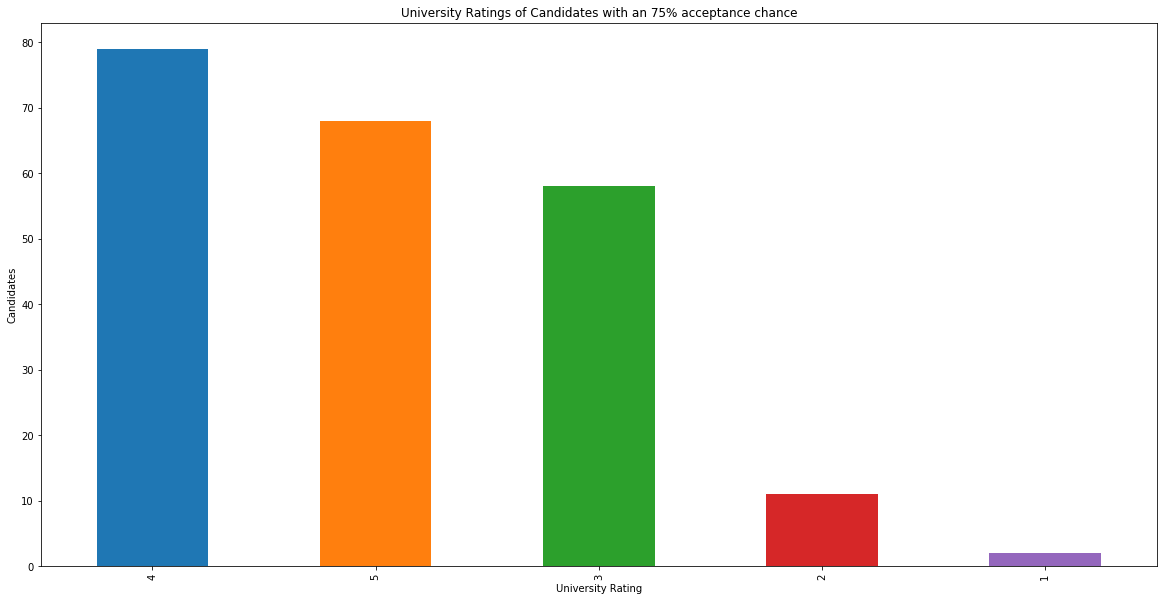

In [57]:
s = data[data["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

In [56]:
data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

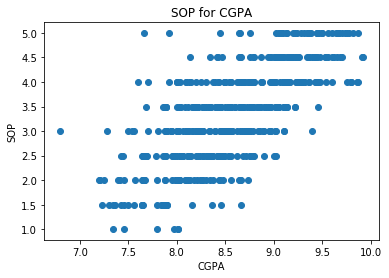

In [58]:
plt.scatter(data["CGPA"],data.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

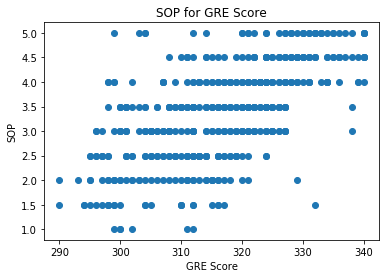

In [59]:
plt.scatter(data["GRE Score"],data["SOP"])
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.title("SOP for GRE Score")
plt.show()

In [60]:
# MACHINE LEARNING ALGORITHM

#SPLITTING THE X AND Y 

serial_no = data["Serial No."].values

In [61]:
# dropping the serial_no tabel from the dataframe

data.drop(["Serial No."], axis = 1 , inplace = True)

In [62]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [63]:
data = data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [64]:
# splitting the data 
x = data.drop(["Chance of Admit"], axis = 1)
y = data["Chance of Admit"].values

In [65]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [66]:
y[0:5]

array([0.92, 0.76, 0.72, 0.8 , 0.65])

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x, y , train_size = 0.75 , random_state = 42)

C:\Users\Virender Pal Singh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [68]:
len(x_train)

375

In [69]:
# Normalize the DataFrame 

from sklearn.preprocessing import MinMaxScaler
ScalerX = MinMaxScaler(feature_range = (0,1))

x_train[x_train.columns] = ScalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = ScalerX.transform(x_test[x_test.columns])

C:\Users\Virender Pal Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Virender Pal Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Virender Pal Singh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Virender Pal Singh\Anaconda3\

In [70]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
227,0.404255,0.642857,0.25,0.625,0.428571,0.554487,0.0
417,0.489362,0.392857,0.50,0.625,0.142857,0.282051,0.0
203,0.872340,1.000000,1.00,0.750,1.000000,0.983974,1.0
126,0.638298,0.750000,0.50,0.750,0.428571,0.807692,1.0
329,0.085106,0.142857,0.25,0.375,0.000000,0.349359,0.0


In [71]:
# LINEAR_REGRESSION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [72]:
from sklearn.linear_model import  LinearRegression
lr = LinearRegression()

In [73]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
y_head_lr = lr.predict(x_test)


In [75]:
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

real value of y_test[1]: 0.84 -> the predict: [0.79674376]
real value of y_test[2]: 0.39 -> the predict: [0.56909668]
r_square score:  0.816321301606212
r_square score (train dataset):  0.8223444375427977


In [78]:
# RANDOM...FOREST >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100 , random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test)

In [80]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_head_rfr))

r_square score:  0.7924503667539375


In [81]:
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))


y_head_rf_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_rf_train))

real value of y_test[1]: 0.84 -> the predict: [0.7788]
real value of y_test[2]: 0.39 -> the predict: [0.6122]
r_square score (train dataset):  0.9715314036855935


In [82]:
# DECISION TREE >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

In [83]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))

r_square score:  0.5885205722502307
real value of y_test[1]: 0.84 -> the predict: [0.79]
real value of y_test[2]: 0.39 -> the predict: [0.58]


In [84]:
y_head_dtr_train = dtr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_dtr_train))

r_square score (train dataset):  1.0


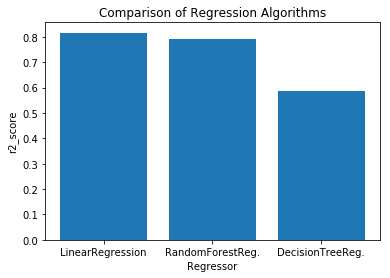

In [85]:
# COMPARISON OF REGRESSION ALGORITHM
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

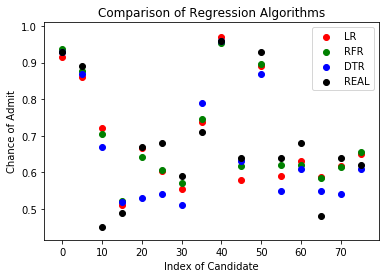

In [86]:
red = plt.scatter(np.arange(0,80,5),y_head_lr[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

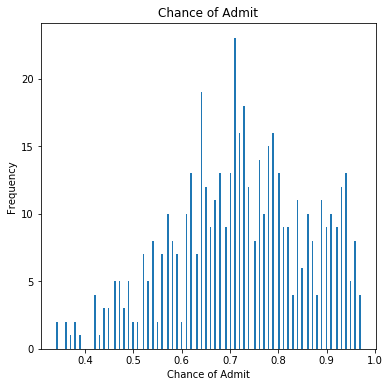

In [88]:
data["Chance of Admit"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()